In [5]:
import pandas as pd
import numpy as np

## get the stock data 

In [16]:
# get the stock data
from google.cloud import storage
def get_stock_data_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/stock_prices"
    df = pd.read_csv(path, sep="\t")#add nrows after if you want to select a specific number of row
    return df


In [17]:
df_stocks = get_stock_data_from_gcp()

In [21]:
df_stocks.rename(columns={"Unnamed: 0":"date"}, inplace=True)

In [22]:
df_stocks = df_stocks.sort_values(["date"], ascending=True)

In [429]:
df_stocks.tail()

,date,AAPL,MSFT,GOOGL,AMZN
4,2021-11-16,151.00,339.51,2957.52,3540.70
3,2021-11-17,153.49,339.12,2960.94,3549.00
2,2021-11-18,157.87,341.27,2996.77,3696.06
1,2021-11-19,160.55,343.11,2978.53,3676.57
0,2021-11-22,161.02,339.83,2926.04,3572.57


In [73]:
df_stocks.to_csv("df_stocks", index=False)

## get the sentiment data

In [828]:
# get the data from GCP
from google.cloud import storage
def get_sentiment_news_data_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/Stocks_news_final_to_use.csv"
    df = pd.read_csv(path)#add nrows after if you want to select a specific number of row
    return df

In [829]:
sentiment = get_sentiment_news_data_from_gcp()

In [830]:
sentiment = sentiment[['date', 'ticker', 'class_label']]

In [831]:
sentiment["date"] = pd.to_datetime(sentiment["date"] , infer_datetime_format=True)

In [835]:
sentiment[sentiment["ticker"]=="GOOGL"][-50:]

,date,ticker,class_label
479,2021-05-31,GOOGL,0.000000
482,2021-06-01,GOOGL,0.421053
485,2021-06-02,GOOGL,0.296296
488,2021-06-03,GOOGL,0.227273
491,2021-06-04,GOOGL,0.320000
494,2021-06-05,GOOGL,0.200000
497,2021-06-06,GOOGL,0.666667
500,2021-06-07,GOOGL,0.290323
503,2021-06-08,GOOGL,0.206897
506,2021-06-09,GOOGL,0.434783


### First GOOGL

In [825]:
sentiment_GOOGL = sentiment[sentiment['ticker'] == 'GOOGL']

<AxesSubplot:xlabel='date'>

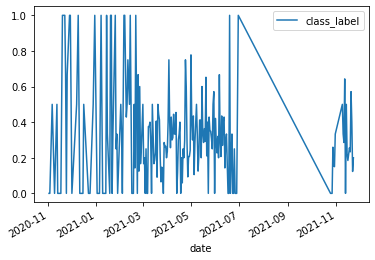

In [826]:
sentiment_GOOGL.set_index(["date"]).plot()

In [817]:
sentiment_GOOGL = sentiment_GOOGL.drop(columns=['ticker'])

In [701]:
sentiment_GOOGL['date'] = pd.to_datetime(sentiment_GOOGL['date'], infer_datetime_format=True)

In [702]:
min_date = sentiment_GOOGL["date"].min()
min_date

Timestamp('2020-11-02 00:00:00')

In [306]:
#sentiment.to_csv("sentiment", index=False)

### stock GOOGLE

In [308]:
df_stocks_GOOGL = df_stocks[['date', 'GOOGL']]
df_stocks_GOOGL["date"] = pd.to_datetime(df_stocks_GOOGL['date'], infer_datetime_format=True)

/tmp/ipykernel_3413/2052759871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_GOOGL["date"] = pd.to_datetime(df_stocks_GOOGL['date'], infer_datetime_format=True)


In [311]:
df_stocks_GOOGL = df_stocks_GOOGL[df_stocks_GOOGL["date"]>= min_date]
df_stocks_GOOGL

,date,GOOGL
266,2020-11-02,1624.32
265,2020-11-03,1645.66
264,2020-11-04,1745.85
263,2020-11-05,1762.50
262,2020-11-06,1759.73
...,...,...
4,2021-11-16,2957.52
3,2021-11-17,2960.94
2,2021-11-18,2996.77
1,2021-11-19,2978.53


In [779]:
sentiment_GOOGL["date"] = pd.to_datetime(sentiment_GOOGL["date"])

<AxesSubplot:xlabel='date'>

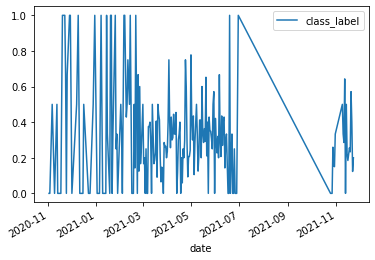

In [778]:
sentiment_GOOGL.set_index(["date"]).plot()

In [754]:
merged_df_GOOGL = pd.merge(df_stocks_GOOGL, sentiment[sentiment['ticker'] == 'GOOGL'], on='date', how="outer")
#merged_df.drop(columns)
merged_df_GOOGL.drop(columns="ticker", inplace=True)

## Preprocess and merge data

In [755]:
merged_df_GOOGL.head()

,date,GOOGL,class_label
0,2020-11-02,1624.32,0.0
1,2020-11-03,1645.66,0.0
2,2020-11-04,1745.85,NaN
3,2020-11-05,1762.50,NaN
4,2020-11-06,1759.73,0.5


In [756]:
merged_df_GOOGL["class_label"].isna().sum()

113

In [757]:
merged_df_GOOGL.sort_values(by='date', ascending=True, inplace=True)

In [758]:
merged_df_GOOGL.reset_index(inplace=True, drop=True)

<AxesSubplot:>

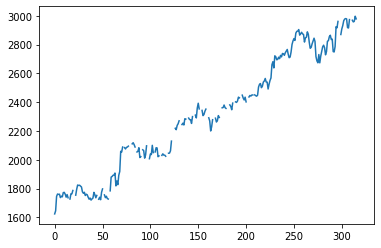

In [759]:
merged_df_GOOGL["GOOGL"].plot()

In [760]:
merged_df_GOOGL["GOOGL"].interpolate(method= "linear", inplace= True)

In [761]:
merged_df_GOOGL["GOOGL"]

0      1624.320000
1      1645.660000
2      1745.850000
3      1762.500000
4      1759.730000
          ...     
315    2978.530000
316    2961.033333
317    2943.536667
318    2926.040000
319    2926.040000
Name: GOOGL, Length: 320, dtype: float64

In [762]:
#merged_df_GOOGL.fillna(value=-1, inplace=True)

In [714]:
#merged_df_GOOGL.to_csv("merged_df_GOOGL")

In [715]:
# @Davy start from this point!!!!!

In [763]:
merged_df = merged_df_GOOGL.copy()

In [764]:
merged_df.tail()

,date,GOOGL,class_label
315,2021-11-19,2978.530000,0.233333
316,2021-11-20,2961.033333,0.571429
317,2021-11-21,2943.536667,0.400000
318,2021-11-22,2926.040000,0.123077
319,2021-11-23,2926.040000,0.200000


In [765]:
merged_df["class_label"].isna().sum()

113

## get the twitter data

In [719]:
#amazon

In [ ]:
from google.cloud import storage
def get_twitter_stocks_sentiment_amazon_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/Amazon1 twitter_stocks_sentiment.csv"
    df = pd.read_csv(path, index_col= False)#add nrows after if you want to select a specific number of row
    return df

In [112]:
#google

In [600]:
from google.cloud import storage
def get_twitter_stocks_sentiment_google_from_gcp(nrows=10000, local=False, optimize=False, **kwargs):
    """method to get the training data (or a portion of it) from google cloud bucket"""
    # Add Client() here
    client = storage.Client()
    if local:
        path = "data/data_data_10Mill.csv"
    else:
        path = "gs://stock-news-pred-bucket/Google1 twitter_stocks_sentiment.csv"
    df = pd.read_csv(path, index_col= False)#add nrows after if you want to select a specific number of row
    return df

In [720]:
df_twitter_googl = get_twitter_stocks_sentiment_google_from_gcp()

In [721]:
df_twitter_googl.drop(columns=["Unnamed: 0"], inplace=True)

In [722]:
df_twitter_googl["date"] = pd.to_datetime(df_twitter_googl["date"], infer_datetime_format=True)

In [723]:
df_twitter_googl.rename(columns={"class_label": "twitter_label"}, inplace=True)
df_twitter_googl.head()

,date,twitter_label
0,2020-11-26,0.000000
1,2020-11-27,0.833333
2,2020-11-28,0.200000
3,2020-11-29,0.000000
4,2020-11-30,0.700000


In [766]:
merged_twitter_df = pd.merge(merged_df, df_twitter_googl, on='date', how='outer')
merged_twitter_df.tail()

,date,GOOGL,class_label,twitter_label
373,2021-10-24,NaN,NaN,0.500000
374,2021-11-06,NaN,NaN,0.000000
375,2021-11-07,NaN,NaN,0.962963
376,2021-11-24,NaN,NaN,0.173913
377,2021-11-25,NaN,NaN,0.428571


In [767]:
merged_twitter_df = merged_twitter_df.sort_values(by="date")
merged_twitter_df.tail()

,date,GOOGL,class_label,twitter_label
317,2021-11-21,2943.536667,0.400000,0.285714
318,2021-11-22,2926.040000,0.123077,0.090909
319,2021-11-23,2926.040000,0.200000,0.076923
376,2021-11-24,NaN,NaN,0.173913
377,2021-11-25,NaN,NaN,0.428571


In [768]:
merged_twitter_df["class_label"].isna().sum()

171

In [769]:
merged_twitter_df["GOOGL"].interpolate(method= "linear", inplace= True)

<AxesSubplot:xlabel='date'>

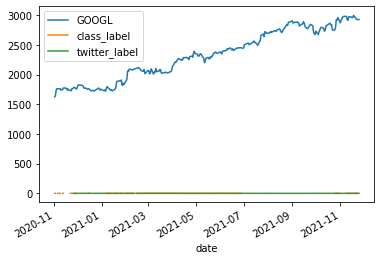

In [770]:
merged_twitter_df.set_index(["date"]).plot()

In [771]:
merged_twitter_df.tail()

,date,GOOGL,class_label,twitter_label
317,2021-11-21,2943.536667,0.400000,0.285714
318,2021-11-22,2926.040000,0.123077,0.090909
319,2021-11-23,2926.040000,0.200000,0.076923
376,2021-11-24,2926.040000,NaN,0.173913
377,2021-11-25,2926.040000,NaN,0.428571


In [772]:
#put the data which dont have to be scaled in the index
# THERE IS NO NEED TO DO SO, YOU CAN SCALE A PARTICULAR COLUMN
# df_temp = merged_df.set_index(["date", "class_label"])
# df_temp = df_temp[["AMZN"]]
# df_temp.shape
# df_temp

### Scaling stocks

In [773]:
merged_twitter_df.columns

Index(['date', 'GOOGL', 'class_label', 'twitter_label'], dtype='object')

In [774]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# INSTANTIATE THE SCALER
scaler = MinMaxScaler()

# FIT IT ONLY ON AMZN
scaler.fit(merged_twitter_df[['GOOGL']])

# YOU NOW HAVE ACCESS TO THE MIN AND MAX OF AMZN
print(f"minimum value = {scaler.data_min_}")
print(f"maximum value = {scaler.data_max_}")

minimum value = [1624.32]
maximum value = [2996.77]


In [775]:
# LET'S CREATE A COPY OF MERGED_DF
data_scaled = merged_twitter_df.copy()

# AND TRANSFORM ONLY THE AMZN COLUMN
data_scaled["GOOGL"] = scaler.transform(data_scaled[['GOOGL']])

# NOW LOOK AT DATA_SCALED
data_scaled.tail(20)

,date,GOOGL,class_label,twitter_label
374,2021-11-06,0.986494,NaN,0.000000
375,2021-11-07,0.987363,NaN,0.962963
304,2021-11-08,0.988233,NaN,0.666667
305,2021-11-09,0.986593,0.500000,0.375000
306,2021-11-10,0.942512,0.333333,0.230769
307,2021-11-11,0.940661,0.285714,0.333333
308,2021-11-12,0.983089,0.642857,0.400000
309,2021-11-13,0.981991,0.000000,0.000000
310,2021-11-14,0.980893,0.500000,0.500000
311,2021-11-15,0.979795,0.222222,0.166667


## prepare it for model LSTM

In [776]:
# SETTING THE DATE AS INDEX
data_scaled.set_index(["date"], inplace= True)

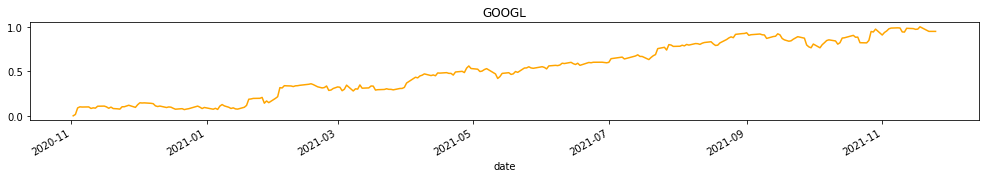

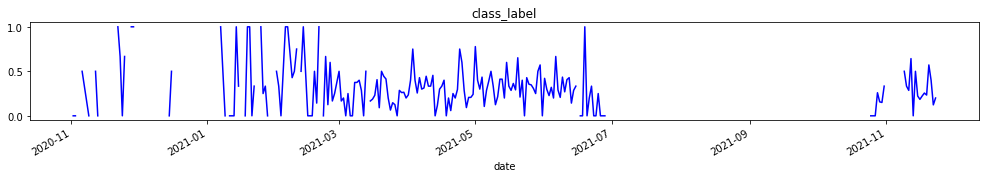

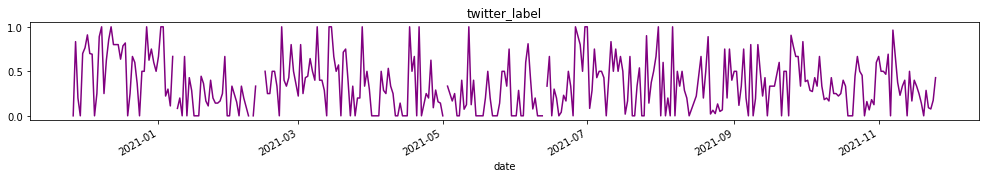

In [777]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in data_scaled.columns:
    if column == "GOOGL": color = "orange"
    if column == "class_label": color = "blue" 
    if column == "twitter_label": color = "purple" 
    data_scaled[column].plot(figsize=(17, 2), color=color)
    plt.title(column)
    plt.show()

In [198]:
data_scaled.describe()

,GOOGL,class_label,twitter_label
count,884.000000,884.000000,824.000000
mean,0.526089,0.305487,0.338004
std,0.279746,0.281280,0.286733
min,0.000000,-1.000000,0.000000
25%,0.310161,0.155128,0.083333
50%,0.523706,0.285714,0.294737
75%,0.798674,0.434783,0.500000
max,1.000000,1.000000,1.000000


In [213]:
data_scaled.drop_duplicates()

,GOOGL,class_label,twitter_label
date,,,
2020-11-02,0.000000,0.333333,NaN
2020-11-02,0.000000,0.000000,NaN
2020-11-03,0.015549,0.000000,NaN
2020-11-04,0.088550,-1.000000,NaN
2020-11-05,0.100681,-1.000000,NaN
...,...,...,...
2021-11-21,0.986710,0.461538,0.285714
2021-11-22,0.948464,0.123077,0.090909
2021-11-22,0.948464,0.109375,0.090909


X.shape = number of sequence?, 30, 2 <br>
y.shape = number of sequence?

In [199]:
import numpy as np

def subsample_sequence(df, length, HORIZON=0):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random
    """
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length+HORIZON]
    # X_sample = df_sample[random_start: random_start+length]
    # y_sample = df_sample[random_start + length:]
    return df_sample

In [201]:
def split_subsample_sequence(df, length, ticker):
    '''Create one single random (X,y) pair'''

    df_subsample = subsample_sequence(df, length)
    y_sample = df_subsample.iloc[length -1][ticker] # -1 means the future window
    
    X_sample = df_subsample[0:length -1]# -1 means the future window
    X_sample = X_sample.values

    return np.array(X_sample), np.array(y_sample)

In [202]:
def compute_means(X, df_mean):
    # Compute means of X
    means = X.mean()
    
    # Case if ALL values of at least one feature of X are NaN, then reaplace with the whole df_mean
    if means.isna().sum() != 0:
        means.fillna(df_mean, inplace=True)
        
    return means

def split_subsample_sequence(df, length, ticker, df_mean=None):
    '''Return one single random sample (X_sample, y_sample) containing one sequence each of length `length`'''
    # Trick to save time during potential recursive calls
    if df_mean is None:
        df_mean = df.mean()

    df_subsample = subsample_sequence(df, length)
    
    y_sample = df_subsample.iloc[length-1][ticker]
    # Case y_sample is NaN: redraw !
    if y_sample != y_sample: # A value is not equal to itself only for NaN
            X_sample, y_sample = split_subsample_sequence(df, length, df_mean) # Recursive call !!!
            return np.array(X_sample), np.array(y_sample)

    X_sample = df_subsample[0:length-1]
    # Case X_sample has some NaNs
    if X_sample.isna().sum().sum() !=0:
        X_sample = X_sample.fillna(compute_means(X_sample, df_mean))
        X_sample = X_sample.values
        
    return np.array(X_sample), np.array(y_sample)

In [203]:
def get_X_y(df, n_sequences, length, ticker): #length = 30, n_sequence = 12, df(12month)
    '''Return a list of samples (X, y)'''
    
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length, ticker)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)

    return X, y

In [204]:
##TESTING THE GET X Y FUNCTION

df = data_scaled
n_sequences = 7
length = 30

X, y = get_X_y(df, n_sequences, length,"GOOGL" )

In [205]:
X.shape, y.shape

((7, 29, 3), (7,))

In [206]:
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(12, figsize=[20,100])
# # fig.suptitle('Vertically stacked subplots')

# for i in range(len(df_list[0])):
#     axs[i].plot(df_list[0][i])

## Train test split

In [207]:
# len of train dataset should be 80%

In [208]:
len_ = int(0.8*data_scaled.shape[0])
df_train = data_scaled[:len_]
df_test = data_scaled[len_:]
print(df_train.shape)
print(df_test.shape)

(707, 3)
(177, 3)


In [209]:
df_train.head()

,GOOGL,class_label,twitter_label
date,,,
2020-11-02,0.000000,0.333333,NaN
2020-11-02,0.000000,0.000000,NaN
2020-11-02,0.000000,0.000000,NaN
2020-11-03,0.015549,0.000000,NaN
2020-11-03,0.015549,0.000000,NaN


In [36]:
X_train, y_train = get_X_y(df_train, 200, 30) # 200 sequences of a length of 30 days
X_test, y_test = get_X_y(df_test, 100, 30) # 200 sequences of a length of 30 days

In [37]:
X_train.shape, y_train.shape

((200, 29, 3), (200,))

In [38]:
X_test.shape, y_test.shape

((100, 29, 3), (100,))

## predict a baseline

In [39]:
# We here decide to predict the mean of the train set y_train
y_pred = np.mean(y_train)
bench_res = np.mean(np.abs(y_pred - y_test)/y_test)*100

print(f'Benchmark MAPE on the test set : {bench_res:.0f} %')

Benchmark MAPE on the test set : 27 %


In [40]:
# Or (better) we predict the last pollution value!
y_pred_baseline = X_test[:,-1,0]
bench_res = np.mean(np.abs(y_pred_baseline - y_test)/y_test)*100
print(f'Benchmark MAPE on the test set : {bench_res:.0f} %')

Benchmark MAPE on the test set : 7 %


## Imports for model


In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

2021-12-01 15:20:14.536255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 15:20:14.536402: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## simple LSTM

In [42]:
def init_model():
    
    # Metrics and optimizers
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)
    
    # Architecture
    
    ## Initialising
    model = models.Sequential()
    
    ## LSTM layer
    model.add(layers.LSTM(20, activation='tanh'))
    
    ## Hidden Dense Layer
    model.add(layers.Dense(5, activation='relu'))
    
    ## Predictive layer : only one neuron because we are predicting the NEXT POINT
    model.add(layers.Dense(1, activation='linear')) # REPLACE 1 WITH HORIZON
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [43]:
model = init_model()

2021-12-01 15:20:21.232845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-01 15:20:21.233019: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-01 15:20:21.233088: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-47G28MR): /proc/driver/nvidia/version does not exist
2021-12-01 15:20:21.233888: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
number_of_rows = len(X_train)
validation_split = 0.2

In [45]:
#number of rows in train
number_of_rows_train_train = number_of_rows * (1 - validation_split)
number_of_rows_train_train

160.0

In [46]:
#number of epochs
np.ceil(160/64)

3.0

In [47]:
batch_size = 64
number_of_iterations_per_epoch = int(np.ceil(len(X_train) / batch_size * (1-validation_split)))
number_of_iterations_per_epoch

3

In [48]:
es = EarlyStopping(monitor ='val_loss',
                   patience=10,
                   restore_best_weights = True)

history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=2, 
                    batch_size=64,
                    # callbacks=[es],
                    verbose=1)

Epoch 1/2
3/3 [==============================] - 11s 1s/step - loss: 0.3046 - mean_absolute_percentage_error: 131.5112 - val_loss: 0.0219 - val_mean_absolute_percentage_error: 52.4705
Epoch 2/2
3/3 [==============================] - 0s 161ms/step - loss: 0.0224 - mean_absolute_percentage_error: 47.4630 - val_loss: 0.0174 - val_mean_absolute_percentage_error: 40.9202


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1920      
                                                                 
 dense (Dense)               (None, 5)                 105       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


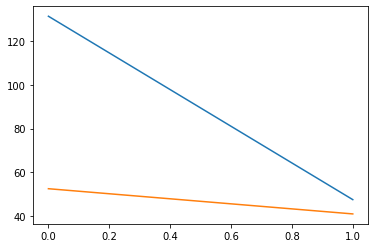

In [50]:
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

In [51]:
res = model.evaluate(X_test, y_test, verbose=1)

print(f'MAPE on the test set : {res[1]:.0f} %')

4/4 [==============================] - 0s 37ms/step - loss: 0.0320 - mean_absolute_percentage_error: 19.7073
MAPE on the test set : 20 %


## Improved Model

In [52]:
def init_model_2():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.005)
    
    model = models.Sequential()
    
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [53]:
model_2 = init_model_2()

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_2 = model_2.fit(X_train, y_train,
            validation_split=0.3,
            epochs=5, 
            batch_size=32,
            callbacks=[es], verbose=1)

Epoch 1/5
5/5 [==============================] - 19s 1s/step - loss: 0.1170 - mean_absolute_percentage_error: 87.9702 - val_loss: 0.0236 - val_mean_absolute_percentage_error: 48.9054
Epoch 2/5
5/5 [==============================] - 1s 233ms/step - loss: 0.0250 - mean_absolute_percentage_error: 49.4600 - val_loss: 0.0200 - val_mean_absolute_percentage_error: 43.2140
Epoch 3/5
5/5 [==============================] - 1s 253ms/step - loss: 0.0190 - mean_absolute_percentage_error: 41.9379 - val_loss: 0.0183 - val_mean_absolute_percentage_error: 38.8840
Epoch 4/5
5/5 [==============================] - 1s 242ms/step - loss: 0.0255 - mean_absolute_percentage_error: 43.3306 - val_loss: 0.0399 - val_mean_absolute_percentage_error: 36.6654
Epoch 5/5
5/5 [==============================] - 1s 238ms/step - loss: 0.0229 - mean_absolute_percentage_error: 42.4100 - val_loss: 0.0195 - val_mean_absolute_percentage_error: 30.6028


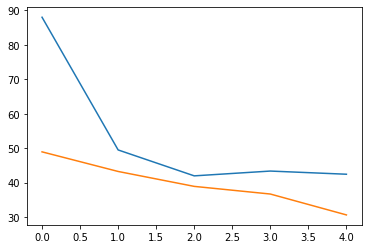

In [54]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['mean_absolute_percentage_error'])
plt.plot(history_2.history['val_mean_absolute_percentage_error'])

In [55]:
res = model_2.evaluate(X_test, y_test, verbose=1)

print(f'MAPE on the test set : {res[1]:.0f} %')

4/4 [==============================] - 0s 63ms/step - loss: 0.0326 - mean_absolute_percentage_error: 20.9842
MAPE on the test set : 21 %


In [56]:
X_test.shape, y_test.shape

((100, 29, 3), (100,))

In [57]:
predictions_2 = model_2.predict(X_test)
predictions_2.shape

(100, 1)

In [58]:
unscaled_predictions_2 = scaler.inverse_transform(predictions_2)
unscaled_predictions_2[0:10] # showing 10 predictions in the test set out of 100 

array([[3265.6296],
       [3248.452 ],
       [3313.2808],
       [3385.4119],
       [3250.6675],
       [3315.1252],
       [3369.8047],
       [3391.695 ],
       [3323.4495],
       [3419.838 ]], dtype=float32)

In [60]:
y_test.reshape(-1,1).shape

(100, 1)

In [836]:
#find the error
y_test.reshape(-1,1)-unscaled_predictions_2

NameError: name 'y_test' is not defined

In [76]:
X, y = get_X_y(df, len(df), 30)

In [77]:
X.shape, y.shape

((385, 29, 3), (385,))

In [78]:
predictions_X = model_2.predict(X)
predictions_X[:10]

array([[0.3691427 ],
       [0.4590493 ],
       [0.36217627],
       [0.4535021 ],
       [0.43706188],
       [0.647418  ],
       [0.2351782 ],
       [0.36017302],
       [0.47573406],
       [0.26065588]], dtype=float32)

In [79]:
unscaled_predictions_X = scaler.inverse_transform(predictions_X)
unscaled_predictions_X[:10]

array([[3239.682 ],
       [3309.7605],
       [3234.2517],
       [3305.4368],
       [3292.6223],
       [3456.5864],
       [3135.262 ],
       [3232.6904],
       [3322.7656],
       [3155.1208]], dtype=float32)

,AMZN
0,3004.48
1,3048.41
2,3241.16
3,3322.00
4,3311.37
...,...
380,3676.57
381,3572.57
382,3572.57
383,3572.57


In [89]:

df_true_pred = merged_df[["date", "AMZN"]]
df_true_pred["predictions"]=unscaled_predictions_X


/tmp/ipykernel_3117/1919949454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_pred["predictions"]=unscaled_predictions_X


In [92]:
df_true_pred.head()

,date,AMZN,predictions,ticker
0,2020-11-02,3004.48,3239.681885,AMZN
1,2020-11-03,3048.41,3309.760498,AMZN
2,2020-11-04,3241.16,3234.251709,AMZN
3,2020-11-05,3322.00,3305.436768,AMZN
4,2020-11-06,3311.37,3292.622314,AMZN


In [91]:
df_true_pred["ticker"] = "AMZN"

In [93]:
df_true_pred.to_csv("LSTM_3features_AMZN")

## Check Performance of the models

In [61]:
def train_model(nb_sequences=200, nb_days=30, plot_history=True,epochs = 10):
    
    X_train, y_train = get_X_y(df_train, nb_sequences, nb_days)
    X_test, y_test = get_X_y(df_test, round(nb_sequences/2), nb_days)

    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)

    model = models.Sequential()
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])


    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train,
            validation_split=0.3,
            epochs=epochs, 
            batch_size=32,
            callbacks=[es],
            verbose=1)

    if plot_history:
        plt.plot(history.history['mean_absolute_percentage_error'])
        plt.plot(history.history['val_mean_absolute_percentage_error'])
        plt.show()

    res = model.evaluate(X_test, y_test, verbose=1)
    print(f'MAPE on the test set : {res[1]:.0f} %')
    return res

Epoch 1/10
5/5 [==============================] - 5s 222ms/step - loss: 0.1355 - mean_absolute_percentage_error: 78.1527 - val_loss: 0.0418 - val_mean_absolute_percentage_error: 58.2556
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 0.0395 - mean_absolute_percentage_error: 47.9022 - val_loss: 0.0566 - val_mean_absolute_percentage_error: 78.4917
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 0.0440 - mean_absolute_percentage_error: 50.2554 - val_loss: 0.0459 - val_mean_absolute_percentage_error: 32.5050
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.0402 - mean_absolute_percentage_error: 45.7380 - val_loss: 0.0180 - val_mean_absolute_percentage_error: 24.1609
Epoch 5/10
5/5 [==============================] - 0s 28ms/step - loss: 0.0338 - mean_absolute_percentage_error: 35.2720 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 48.8844
Epoch 6/10
5/5 [==============================] - 0s 31ms/step - loss: 0.0

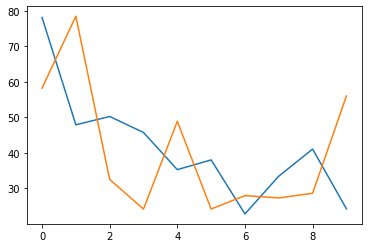

4/4 [==============================] - 0s 4ms/step - loss: 0.0487 - mean_absolute_percentage_error: 33.6792
MAPE on the test set : 34 %


[0.048741456121206284, 33.679195404052734]

In [140]:
train_model(nb_sequences=200, nb_days=30, plot_history=True)

## manual Grid Search LSTM

In [ ]:
nb_days_grid = [12,30,60]
nb_sequences_grid = [12, 50, 100]
MAPE = []

In [ ]:
for nb_days in nb_days_grid:
    for nb_sequences in nb_sequences_grid:
        res = train_model(nb_sequences=nb_sequences, nb_days=nb_days)
        MAPE.append((nb_days, nb_sequences, res[1]))
        print(f'For {nb_sequences} sequences and {nb_days} days of observation, the MAPE is of {res[1]:.0f} %')

In [ ]:
MAPE

In [ ]:
import matplotlib
x = [res[0] for res in MAPE] # n_days
y = [res[1] for res in MAPE] # n_seq
c = [res[2] for res in MAPE] # MAPE  
plt.scatter(x, y, c=c, norm=matplotlib.colors.Normalize(clip=False), cmap='coolwarm') # vmin=20, vmax=50, 

In [ ]:
# sns.heatmap(data= x, y, c=c)

## Test LSTM with prediction

In [69]:
def train_model_predict(nb_sequences=12, nb_days=30, plot_history=False):
    X_train, y_train = get_X_y(df_train, nb_sequences, nb_days)
    X_test, y_test = get_X_y(df_test, round(nb_sequences*0.2), nb_days)

    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)

    model = models.Sequential()
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])


    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train,
            validation_split=0.3,
            epochs=1000, 
            batch_size=64,
            callbacks=[es],
            verbose=0)

    if plot_history:
        plt.plot(history.history['mean_absolute_percentage_error'])
        plt.plot(history.history['val_mean_absolute_percentage_error'])
        plt.show()

    res = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    return res, y_pred

In [70]:
result = train_model_predict(nb_sequences=12, nb_days=30, plot_history=False)


In [71]:
result

([0.05257798358798027, 29.545623779296875],
 array([[0.45786142],
        [0.5031962 ]], dtype=float32))

In [72]:
result_1  = result[1][0]
result_1 = result_1.reshape(-1, 1)

In [ ]:
y_pred = scaler.inverse_transform(result_1)

In [ ]:
y_pred[0][0]

In [ ]:
scaler.inverse_transform(X_test[0])

In [ ]:
scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
def train_model_predict(nb_sequences=12, nb_days=30, plot_history=False):
    X_train, y_train = get_X_y(df_train, nb_sequences, nb_days)
    X_test, y_test = get_X_y(df_test, round(nb_sequences*0.2), nb_days)

    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)

    model = models.Sequential()
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])


    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train,
            validation_split=0.3,
            epochs=1000, 
            batch_size=64,
            callbacks=[es],
            verbose=0)

    if plot_history:
        plt.plot(history.history['mean_absolute_percentage_error'])
        plt.plot(history.history['val_mean_absolute_percentage_error'])
        plt.show()

    return model

model = train_model_predict(X_test)

In [ ]:
X_test

## Plot the results

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_test_transformed, color = 'black', label = 'AMZN Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()